# Chapter 6 Topology in band structure
## 1. Topology in 1D chain


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Prepareing matrix
def calc_1D(k, t, dt):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)     
    mat_Htb[0,1] = -(t + dt) - (t-dt)  * np.exp(complex(0,k))
    mat_Htb[1,0] = -(t + dt) - (t-dt)  * np.exp(complex(0,-k))
    return mat_Htb

# 
def calc_eigen(t, dt):
    k_mesh = np.linspace(-np.pi, np.pi, 100)
    # Lists to record two bands, eigen vectors, and relatice angles
    band_d = np.zeros((len(k_mesh)))
    band_u = np.zeros((len(k_mesh)))
    vec_u = np.zeros((len(k_mesh),2), dtype=complex)     
    vec_d = np.zeros((len(k_mesh),2), dtype=complex)
    ang_u = np.zeros((len(k_mesh)))
    ang_d = np.zeros((len(k_mesh)))

    for i in range(len(k_mesh)):
        mat_H = calc_1D(k_mesh[i], t, dt)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        """
        The original shape of mat_v is
        [[a1 b1]
         [a2 b2]]
        Therefore, it is converted to 
        [[a1 a2]
         [b1 b2]]
        shape by using .T for convenient.
        """
        mat_v = mat_v.T
        mat_v = mat_v[ind]
        band_d[i] = energy[0]
        band_u[i] = energy[1]
        vec_d[i] = mat_v[0]
        vec_u[i] = mat_v[1]
        """
        Caluculating the relative angle of second eigenvalue with respect ot the first one.
        """
        ang_d[i] = np.angle(mat_v[0][1]/mat_v[0][0])
        ang_u[i] = np.angle(mat_v[1][1]/mat_v[1][0])
    
    return k_mesh, band_d, band_u, vec_d, vec_u, ang_d, ang_u

Calculate the band structure and phase for $dt = \pm 1$ cases. 

C:\Users\k708a\AppData\Local\Temp\ipykernel_19344\2488777638.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  band_d[i] = energy[0]
C:\Users\k708a\AppData\Local\Temp\ipykernel_19344\2488777638.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  band_u[i] = energy[1]


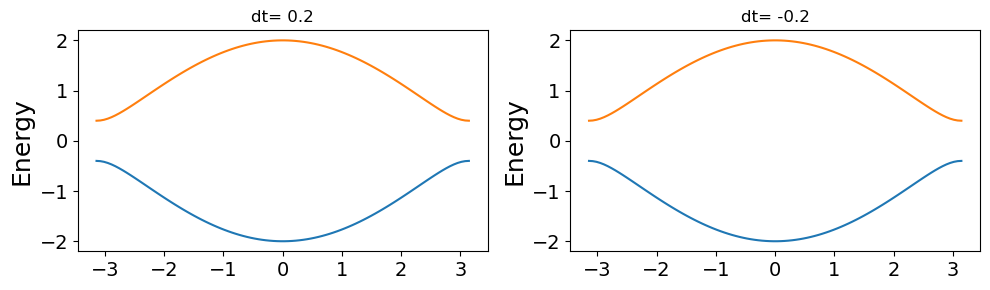

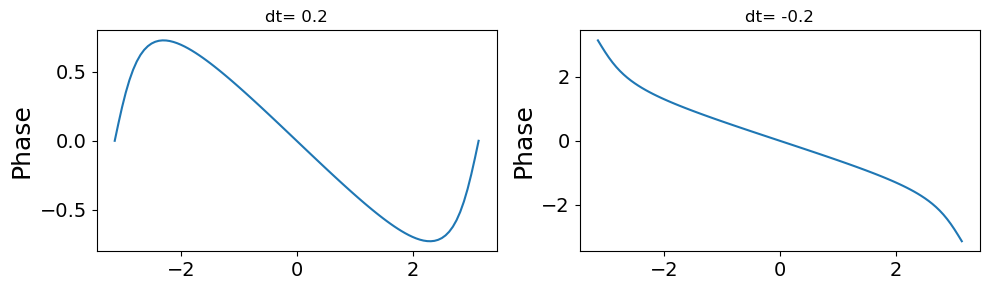

In [3]:
t = 1
dt = 0.2
kp, band_dp, band_up, vec_dp, vec_up, ang_dp, ang_up = calc_eigen(t, dt)

t = 1
dt = -0.2
km, band_dm, band_um, vec_dm, vec_um, ang_dm, ang_um = calc_eigen(t, dt)

# Plotting bands
plt.rcParams["figure.figsize"] = (10,3)
plt.subplot(1,2,1)
plt.title("dt= 0.2")
plt.plot(kp, band_dp)
plt.plot(kp, band_up)
plt.ylabel("Energy", fontsize = 18)
plt.tick_params(labelsize=14)
plt.subplot(1,2,2)
plt.title("dt= -0.2")
plt.plot(km, band_dm)
plt.plot(km, band_um)
plt.ylabel("Energy", fontsize = 18)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

#Plotting phases for the lower band
plt.subplot(1,2,1)
plt.title("dt= 0.2")
plt.plot(kp, ang_dp)
plt.ylabel("Phase", fontsize = 18)
plt.tick_params(labelsize=14)
plt.subplot(1,2,2)
plt.title("dt= -0.2")
plt.plot(km, ang_dm)
plt.ylabel("Phase", fontsize = 18)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

## 2. Topology in honeycomb lattice
We have calculated the band structure of graphene. Remined that there are also two components in the wave funcction, that is the same as the 1D chain case. Let us consider the phase of wave function in graphene case.

C:\Users\k708a\AppData\Local\Temp\ipykernel_19344\1456569896.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  band[j][i] = energy[0]


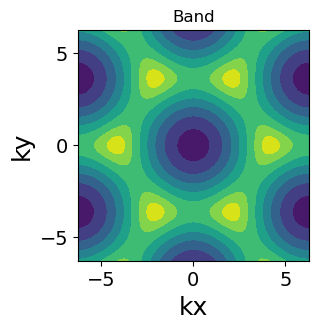

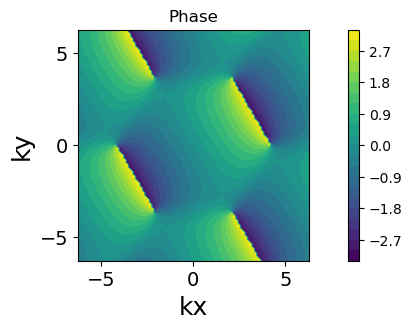

In [9]:
# Hamiltonian for the honeycomb lattice, that is same as we used in chapter 4
def calc_HGraphenekxky_test(kx,ky,μ):
    N = 2
    mat_Htb = np.zeros((N,N), dtype=complex)   
    mat_Htb += (-μ)*np.eye(N)
    t = -1.0
    c = np.sqrt(3)/2
 
    for a in (0, 1):
        if a == 0:
            b = 1
        else:
            b = 0
        ii = a
        jj = b
        if a == 0:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, -kx))+t*np.exp(complex(0,-ky*c))*np.exp(complex(0,-kx/2))                    
        elif a ==1:
            mat_Htb[ii,jj] = t+t*np.exp(complex(0, kx))+t*np.exp(complex(0, ky*c))*np.exp(complex(0,kx/2))
    return mat_Htb

Nk = 100
kx = np.linspace(-2*np.pi, 2*np.pi, Nk)
ky = np.linspace(-2*np.pi, 2*np.pi, Nk)
kX, kY = np.meshgrid(kx, ky)
# Lists to record the results for each (kx,ky)
band = np.zeros((len(ky), len(kx)))
vec_rec = np.zeros((len(ky), len(kx), 2), dtype=complex)
ang_rec = np.zeros((len(ky), len(kx)))


for i in range(len(kx)):
    for j in range(len(ky)):
        x = kx[i]
        y = ky[j]
        mat_H = calc_HGraphenekxky_test(x,y,0)
        energy, mat_v  = np.linalg.eig(mat_H)
        ind = np.argsort(energy)
        energy = energy[ind]
        band[j][i] = energy[0]        
        vec = mat_v.T
        vec = vec[ind]
        vec_rec[j][i] = vec[0]
        ang_rec[j][i] = np.angle(vec[0][1]/vec[0][0])

# Plotting band
plt.contourf(kX, kY, band)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)
plt.title("Band")
plt.show()

# Plotting the phase of wavefunction
plt.contourf(kX, kY, ang_rec, levels = 20)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)
plt.title("Phase")
plt.colorbar()
plt.show()

書き直し
書き直し
Let us try calculating the values related to the phase of wave function.
The Berry connection is defined as 
$$
a (k)=-i<\phi(k)|\nabla_{k}|\phi(k)>,
$$
In the diagonalization, the eigenvalues has the freedom of the phase. In other words, if 
$$
c_1 = e^{i\theta_1}, c_2 = e^{i\theta_2}
$$
are the eigenvaues, the values with the addditional phase, such as 
$$
c_1 = e^{i(\theta_1-\phi)}, c_2 = e^{i(\theta_2 -\phi)}
$$
are also the solution. Therefore, by choosing $\phi = \theta_1$ (thus, $c_1 = 1, c_2 =e^{i(\theta_2-\theta_1)} $), the following calculation becomes simple. 

Now the eigenvalues are
$$
|\phi(k)>=
\begin{pmatrix}
  1\\
  e^{i(\theta_2(k)-\theta_1(k))}
\end{pmatrix}.
$$
Following the defenition, we will firstly calculate $\nabla_{k}|\phi(k)>$, where $\nabla_{k}=(\frac{\partial}{\partial k_x}, \frac{\partial}{\partial k_y})$. The value will be a vector as follows:
$$
\nabla_{k}|\phi(k)>=
\begin{pmatrix}
  \nabla_{k}1\\
  \nabla_{k}e^{i(\theta_2(k)-\theta_1(k))}
\end{pmatrix}
=
\begin{pmatrix}
  (0, 0)\\
  \left(\frac{\partial}{\partial k_x}e^{i(\theta_2(k)-\theta_1(k))}, \frac{\partial}{\partial k_y}e^{i(\theta_2(k)-\theta_1(k)}\right)
\end{pmatrix}.
$$
It can be calculated by using np.gradient function. 


Then, get the inner product with the $<\phi(k)|$, that is the conjugate of $|\phi(k)>$.
$$
\begin{align}
<\phi(k)|\nabla_{k}|\phi(k)>&= 
\left( 1, e^{-i(\theta_2(k)-\theta_1(k))}\right)
\begin{pmatrix}
  (0, 0)\\
  \left(\frac{\partial}{\partial k_x}e^{i(\theta_2(k)-\theta_1(k))}, \frac{\partial}{\partial k_y}e^{i(\theta_2(k)-\theta_1(k)}\right)
\end{pmatrix}\\
&=
1\times (0, 0) + e^{-i(\theta_2(k)-\theta_1(k))}\times \left(\frac{\partial}{\partial k_x}e^{i(\theta_2(k)-\theta_1(k))}, \frac{\partial}{\partial k_y}e^{i(\theta_2(k)-\theta_1(k))}\right)\\
&=i\left(\frac{\partial (\theta_2(k)-\theta_1(k))}{\partial k_x}, \frac{\partial (\theta_2(k)-\theta_1(k))}{\partial k_y}
\right)
\end{align}
$$
Finally, multiply by $-i$ results in the Berry connection, which is the vector value. 

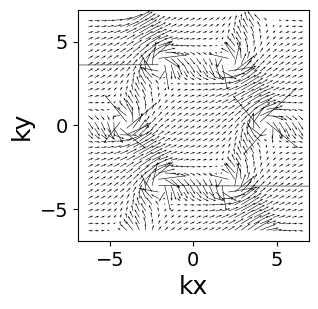

In [13]:
# Berry connection
# c_2 will be expressed by "rel_vec".
rel_vec = vec_rec[:,:,1]/vec_rec[:,:,0]
# Getting the gradient. x and y components are separatedly obtained.
vec_grad_y,vec_grad_x = np.gradient(rel_vec)
# Getting the x and y component of Berry connection.
conn_x = -rel_vec.conjugate()* vec_grad_x*complex(0, 1)
conn_y = -rel_vec.conjugate()* vec_grad_y*complex(0, 1)

# Showing in a graph
# For avoid showing too much arrows, the number of k ponts is limited
cut = 3
kX_cut = kX[::cut,::cut]
kY_cut = kY[::cut,::cut]
conn_x_cut = conn_x[::cut,::cut]
conn_y_cut = conn_y[::cut,::cut]

plt.quiver(kX_cut, kY_cut, conn_x_cut,  conn_y_cut,scale = 3)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)
# plt.title("Berry connection")
plt.show()


Then, let us calculate the Berry curvature, that is defined as fllows;
$$
\begin{align}
F (k) &=\nabla _{k}\times a(k)\\
&= \frac{\partial}{\partial k_x}a_y - \frac{\partial}{\partial k_y}a_x
\end{align}.
$$

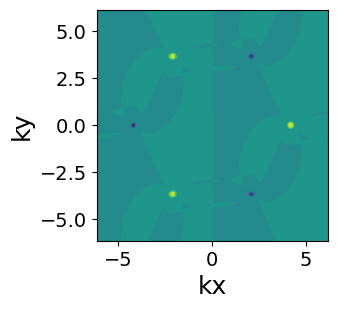

In [11]:
# Function to calculate the derivative using the convolusion 
def convolve2d(image, filter):
  shape = (image.shape[0] - filter.shape[0] + 1, image.shape[0] - filter.shape[0] + 1) + filter.shape
  strides = image.strides * 2
  strided_image = np.lib.stride_tricks.as_strided(image, shape, strides)
  return np.einsum('kl,ijkl->ij', filter, strided_image)

# Functions to prepare the kernel for the derivative in x direction.
def filter_y(vals):
    filter = np.array([[0, 1/2, 0], [0, 0, 0], [0, -1/2, 0]])
    return convolve2d(vals, filter)

# that for y direction.
def filter_x(vals):
    filter = np.array([[0, 0, 0], [1/2, 0, -1/2], [0, 0, 0]])
    return convolve2d(vals, filter)

# Main function
def calc_curl(conn_x, conn_y):
    div_x = filter_x(conn_y)
    div_y = filter_y(conn_x)
    return div_x - div_y

# Calculating the uter product with Berry connection
curv = calc_curl(conn_x, conn_y)

# Shwoing as graph
kX2 = kX[1:Nk-1,1:Nk-1]
kY2 = kY[1:Nk-1,1:Nk-1]
plt.contourf(kX2, kY2, curv, levels = 20)
plt.gca().set_aspect('equal')
plt.xlabel("kx", fontsize = 18)
plt.ylabel("ky", fontsize = 18)
plt.tick_params(labelsize=14)
# plt.title("Berry curvature")
plt.show()